Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [ ]:
NICKNAME = "meedovique"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [1]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    
    a = -3/2
    b = 2
    c = -1/2
    fder = (a * f(x) + b * f(x + h) + c * f(x + 2 * h)) / h
    return fder

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [2]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Да, будет совпадать. При линейном увеличении шага, ошибка будет квадратично уменьшаться, тк. степень аппроксимации 2

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [3]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

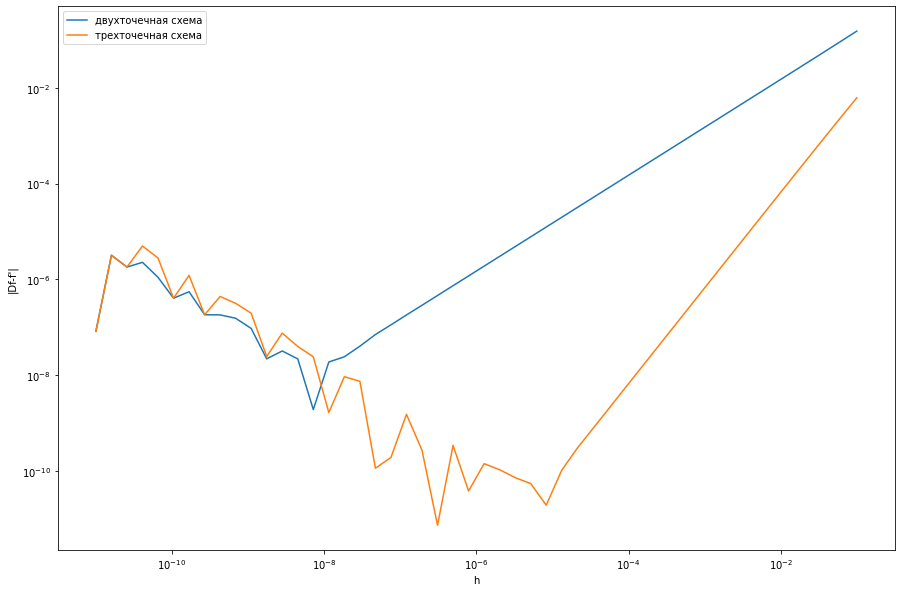

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def twoPointScheme(f, x, h):
    fder = (f(x + h) - f(x)) / h
    return fder

def threePointScheme(f, x, h):
    a = -3/2
    b = 2
    c = -1/2
    fder = (a * f(x) + b * f(x + h) + c * f(x + 2 * h)) / h
    return fder

x = 1
hList = np.logspace(-11, -1)
diff1 = []
diff2 = []
for h in hList:
    diff1.append(abs(twoPointScheme(f, x, h) - fder(x)))
    diff2.append(abs(threePointScheme(f, x, h) - fder(x)))
    
plt.figure(figsize=(15, 10))
plt.loglog(hList, diff1, '-', label='двухточечная схема')
plt.loglog(hList, diff2, '-', label='трехточечная схема')
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()
plt.show()

ошибка в двухточечной схеме перестает падать примерно при $h = 10^{-8}$<br>
ошибка в трехточечной схеме перестает падать примерно при $h = 10^{-6}$

### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [87]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


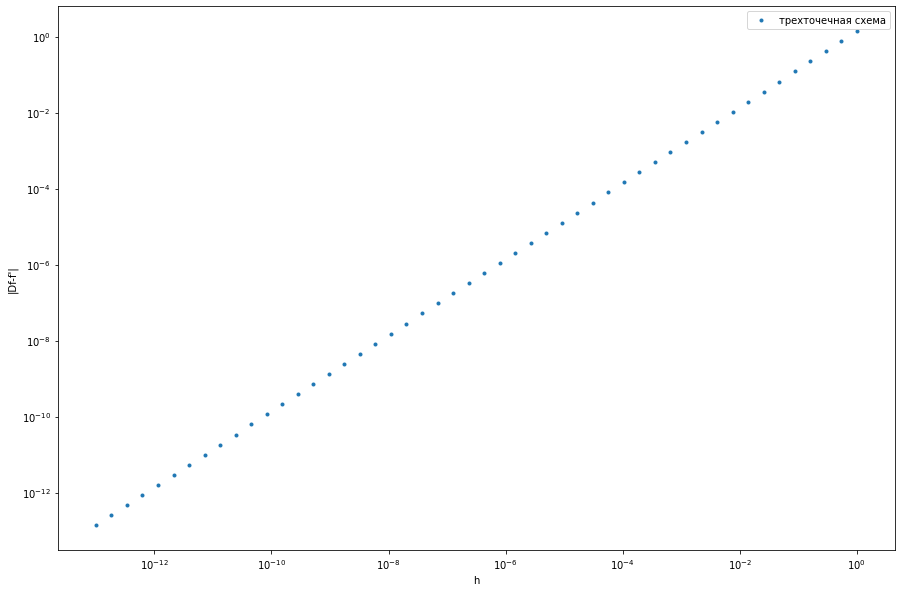

In [88]:
x = 0
diff = []
hList = np.logspace(-13, 0)
for h in hList:
    diff.append(abs(threePointScheme(f, x, h) - fder(x)))

plt.figure(figsize=(15, 10))
plt.loglog(hList, diff, '.', label = 'трехточечная схема')
plt.xlabel('h')
plt.ylabel("|Df-f'|")
plt.legend()
plt.show()

посчитаем отклонение в данном случае:<br>

$ |Df(0, h) - f'(0)| = \left|\frac{-\frac{3}{2}f(0)\,+\,2f(h)\,-\,\frac{1}{2}f(2 h)}{h}\right| =
\left|\frac{0\,+\,2 h^2 log(h)\,-\,\frac{1}{2} (2h)^2 log(2h)}{h}\right| = 
2 h log(\frac{1}{2})
$ - линейная зависимость

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [341]:
def midpoint_rule(func, a, b, eps, compareToN = lambda n: n * 2, step = lambda n: n * 2):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    def getMidF(f, left, right): 
        return f((left + right) / 2) * (right - left)
    
    n = 1
    err = abs(eps) + 1
    while err > eps:
        allNPoints = np.linspace(a, b, num = n + 1)
        integralNPoints = np.array([getMidF(func, allNPoints[i], allNPoints[i + 1]) for i in range(n)])
        integralN = np.sum(integralNPoints)
        
        cmpN = compareToN(n)
        allCmpPoints = np.linspace(a, b, num = cmpN + 1)
        integralCmpPoints = np.array([getMidF(func, allCmpPoints[i], allCmpPoints[i + 1]) for i in range(cmpN)])
        integralCmp = np.sum(integralCmpPoints)
        
        err = abs(integralCmp - integralN)
        n = step(n)
        
    return integralN, n

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


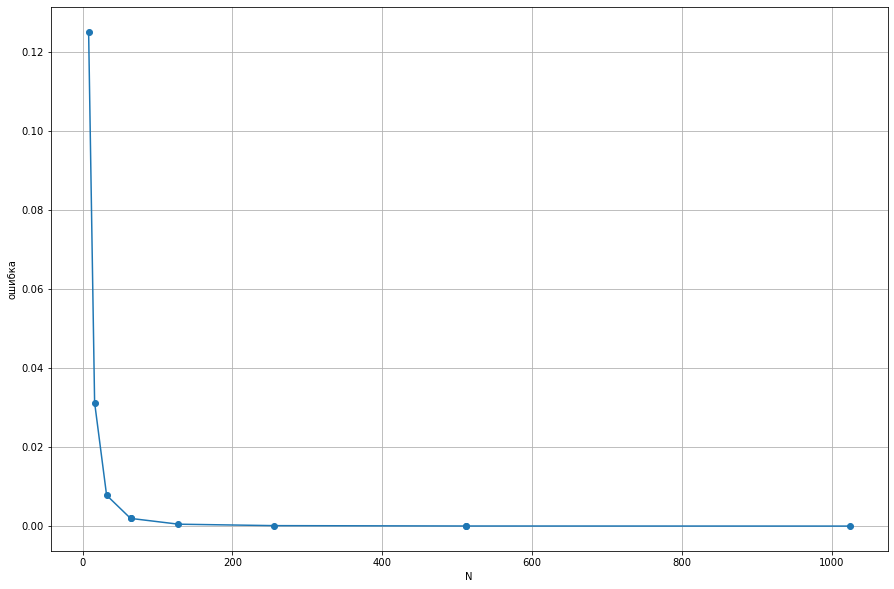

ошибка интеграла при eps = 1e-05: 7.62939453125e-06


In [343]:
from math import sqrt

f = lambda x: x**3
a, b = 0, 2
integralTrue = 2**4 / 4 - 0**4 / 4

epsList = np.logspace(-5, -1, 10)
nList = []
diffList = []
for e in epsList:
    integralFromAlgo, n = midpoint_rule(f, a, b, e)
    diffList.append(abs(integralFromAlgo - integralTrue))
    nList.append(n)

plt.figure(figsize=(15, 10))
plt.plot(nList, diffList, '-o', label="График ошибки")
plt.xlabel("N")
plt.ylabel("ошибка")
plt.grid(True)
plt.show()

eps = 1e-5
integral, n = midpoint_rule(f, a, b, eps)
print(f"ошибка интеграла при eps = {eps}:", abs(integral - integralTrue))

ошибка интеграла не попадает в интервал заданной ошибки<br>
по графику видно, что скорость сходимости равна ожидаемой $O(N^{-2})$

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [348]:
%%time
f = lambda x: np.sin(np.sqrt(x))/x
a = 0
b = 1
eps = 1e-4

i, n = midpoint_rule(f, a, b, eps, step = lambda n: n * 2)
print(f'в лоб: {i}, интервалов: {n}')

в лоб: 1.8918707800674504, интервалов: 8388608
Wall time: 1min 32s


оценим особенность:<br>
$ \int_{0}^{h} \frac{\sin \sqrt x}{x} dx \xrightarrow[\text{taylor}]{}
2\sqrt{x} - \frac{x^{\frac{3}{2}}}{9} + \frac{x^{\frac{5}{2}}}{300} + O(x^{\frac{7}{2}}) \bigg|_{x = h}
$

In [349]:
%%time
def midpointWithSingularityInA(func, a, b, eps, compareToN = lambda n: n * 2, step = lambda n: n * 2):
    def getMidF(f, left, right): 
        return f((left + right) / 2) * (right - left)
    
    n = 2
    err = abs(eps) + 1
    h = None
    while err > eps:
        h = (b - a) / (n + 2)
        
        allNPoints = np.linspace(h + a, b, num = n + 1)
        integralNPoints = np.array([getMidF(func, allNPoints[i], allNPoints[i + 1]) for i in range(n)])
        integralN = np.sum(integralNPoints)
        
        cmpN = compareToN(n)
        allCmpPoints = np.linspace(h + a, b, num = cmpN + 1)
        integralCmpPoints = np.array([getMidF(func, allCmpPoints[i], allCmpPoints[i + 1]) for i in range(cmpN)])
        integralCmp = np.sum(integralCmpPoints)
        
        err = abs(integralCmp - integralN)
        n = step(n)
        
    return integralN, n, h

f = lambda x: np.sin(np.sqrt(x)) / x
i, n, h = midpointWithSingularityInA(f, a, b, eps)
i = i + 2 * h**0.5 - h**1.5 / 9 + h**2.5 / 300
print(f'в лоб: {i}, интервалов: {n}')

в лоб: 1.8920605564009427, интервалов: 65536
Wall time: 786 ms


без особенности алгоритм считает гораздо быстрее 

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

оценим особенность:<br>
$ I = \int_0^1\frac{e^x}{\sqrt{x(1-x)}}dx
\\
\int_0^h\frac{e^x}{\sqrt{x(1-x)}}dx \xrightarrow[\text{taylor in 0}]{} 
2\sqrt{x} + x^{\frac{3}{2}} + \frac{11}{20}x^{\frac{5}{2}} + O(x^{\frac{7}{2}}) \,\bigg|_{x = h}
\\
\int_{1-h}^1\frac{e^x}{\sqrt{x(1-x)}}dx \xrightarrow[\text{substitution 1 - x = t}]{}
\int_h^0\frac{e^{1-t}}{\sqrt{(1-t)t}}dt \xrightarrow[\text{taylor in 0}]{}
-\left( 2\,e\sqrt{t} - \frac{1}{3}\,e t^{\frac{3}{2}} + \frac{3}{20}\,e t^{\frac{5}{2}} + O(t^{\frac{7}{2}}) \right) \bigg|_{x = h}
$

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [398]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    def taylor1(x):
        return 2 * np.sqrt(x) + x**(3 / 2) + 11/20 * x**(5 / 2)
    def taylor2(t):
        return -(2 * np.e * np.sqrt(t) - 1/3 * np.e * t**(3 / 2) + 3/20 * np.e * t**(5 / 2))
    
    def getPartition(f, a, b):
        return 0.5 * (f(a) + f(b)) * (b - a)
    
    f = lambda x: np.divide(np.exp(x), np.sqrt(x * (1 - x)), out = np.zeros_like(x), where = np.logical_and(x != 1, x != 0))
    points = np.linspace(a, b, npts)
    h = 1 / npts
    return np.sum(getPartition(f, points[:-1], points[1:])) + taylor1(h) - taylor2(h)

npts = 100000
integral = integ(npts)
print(f"integral: {integral}, diff: {integral - 5.508429774}")

integral: 5.514774971036419, diff: 0.00634519715641968


In [382]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
